# 导入包、配置路径

In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

# 数据文件夹路径
path = "/content/drive/MyDrive/Colab Notebooks/AndrewNg-Machine-Learning-Homework/ex1-Linear-Regression"

# 假设函数
## 单样本：
$$h(\theta)
=\theta^Tx
=\theta_0+\theta_1x$$
其中：$h(\theta)$为标量，$\theta$为(n+1)×1维，$x$为(n+1)×1维。

## 多样本：
$$h(\theta)
=X^T\theta$$
其中：$h(\theta)$为标量，$\theta$为(n+1)×1维，$X$为m×(n+1)维。

In [131]:
def Hypothesis(X, theta):
  return X @ theta

## 代价函数
### 原公式：
$$J(\theta)
=\frac{1}{2m}\sum_{i=1}^{m}(\hat y^{(i)}-y^{(i)})^2
=\frac{1}{2m}[(\hat y^{(1)}-y^{(1)})^2+(\hat y^{(2)}-y^{(2)})^2+...+(\hat y^{(m)}-y^{(m)})^2]$$
其中：$J(\theta)$为标量。
### 实现公式：
$$J(\theta)=\frac{1}{2m}(\hat y-y)^T(\hat y-y)$$
其中：$J(\theta)$为标量，
$$(\hat y-y)^T=
\begin{bmatrix}
\hat y^{(1)}-y^{(1)}  & \hat y^{(2)}-y^{(2)} & ... & \hat y^{(m)}-y^{(m)}
\end{bmatrix}_{1\times m}
\\
(\hat y-y)=
\begin{bmatrix}
\hat y^{(1)}-y^{(1)}
\\
\hat y^{(2)}-y^{(2)}
 \\
...
 \\
\hat y^{(m)}-y^{(m)}
\end{bmatrix}_{m\times 1}
$$

In [132]:
def CostFunction(X, Y, theta):
  m = len(Y)
  y_hat = Hypothesis(X, theta)
  return 1/(2*m) * (y_hat - Y).T@(y_hat - Y)

## 计算权重偏导
### 原公式
Repeat j from 0 to n:
$$\frac{\partial J(\theta)}{\partial \theta_j}
=\frac{1}{m}\sum_{i=1}^{m} (\hat y^{(i)}-y^{(i)})x_j^{(i)}
=\frac{1}{m}[(\hat y^{(1)}-y^{(1)})x_j^{(1)}+(\hat y^{(2)}-y^{(2)})x_j^{(2)}+...+(\hat y^{(m)}-y^{(m)})x_j^{(m)}]$$
其中：$\frac{\partial J(\theta)}{\partial \theta_j}$为标量，
$$(\hat y-y)=
\begin{bmatrix}
\hat y^{(1)}-y^{(1)}
\\
\hat y^{(2)}-y^{(2)}
 \\
...
 \\
\hat y^{(m)}-y^{(m)}
\end{bmatrix}_{m\times 1}$$

### 实现公式：
$$\frac{\partial J(\theta)}{\partial \theta}
=\frac{1}{m}X^T(\hat y-y)$$
其中：
$\frac{\partial J(\theta)}{\partial \theta}$为(n+1)×1维，
$$X^T=\begin{bmatrix}
x_0^{(1)}  & x_0^{(2)} & ... & x_0^{(m)}\\
x_1^{(1)}  & x_1^{(2)} & ... & x_1^{(m)}\\
 \vdots   & \vdots & \vdots & \vdots\\
x_n^{(1)}  & x_n^{(2)} & ... & x_n^{(m)}
\end{bmatrix}_{(n+1)\times m}
(\hat y-y)=
\begin{bmatrix}
\hat y^{(1)}-y^{(1)}
\\
\hat y^{(2)}-y^{(2)}
 \\
...
 \\
\hat y^{(m)}-y^{(m)}
\end{bmatrix}_{m\times 1}$$

In [133]:
def ComputePartial(X, Y, theta):
  m = len(Y)
  y_hat = Hypothesis(X, theta)
  return 1/m * X.T @ (y_hat - Y)

## 梯度下降迭代并计算J(θ)
公式：
$$
\theta = \theta - \alpha\frac{\partial J(\theta)}{\partial \theta}
$$

In [134]:
def GradientDescent(X, Y, theta, Iterations, LearningRate):
  cost = np.zeros(Iterations)
  for i in range(0, Iterations):
    cost[i] = CostFunction(X, Y, theta)
    theta = theta - LearningRate * ComputePartial(X, Y, theta)
  return cost, theta

# 单变量线性回归

## 加载数据

In [135]:
path1 = path + "/ex1data1.txt"
data = pd.read_csv(path1, header=None, names=["Population", "Profit"]) # sep：读取csv文件时指定的分隔符，默认为逗号。
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


## 切割数据

In [136]:
data.insert(0, 'Ones', 1) # 给数据增加一维全1

In [137]:
cols = data.shape[1] # 获取列数

X = np.array(data.iloc[:, 0:cols-1]) # [97, 2]
Y = np.array(data.iloc[:, cols-1:cols])   # [97, 1]
X, Y

(array([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

## 数据可视化

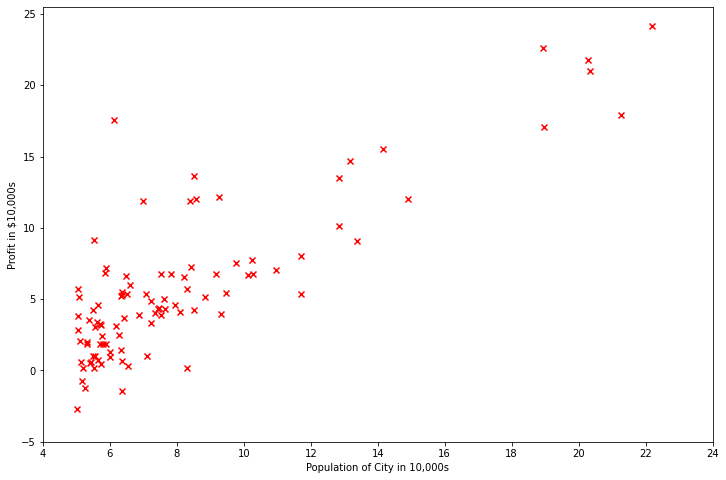

In [138]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(X[:, 1], Y, marker="x", color="r")
ax.set_xlabel("Population of City in 10,000s")
ax.set_ylabel("Profit in $10,000s")
plt.xticks(np.arange(4, 25, 2))
plt.yticks(np.arange(-5, 26, 5))
plt.show()

## 运行梯度下降

In [139]:
# 超参数
Iterations = 1000
LearningRate = 0.02

theta = np.matrix(np.zeros(X.shape[1])).T

cost, theta = GradientDescent(X, Y, theta, Iterations, LearningRate)
# print(cost)

## 绘制代价函数曲线

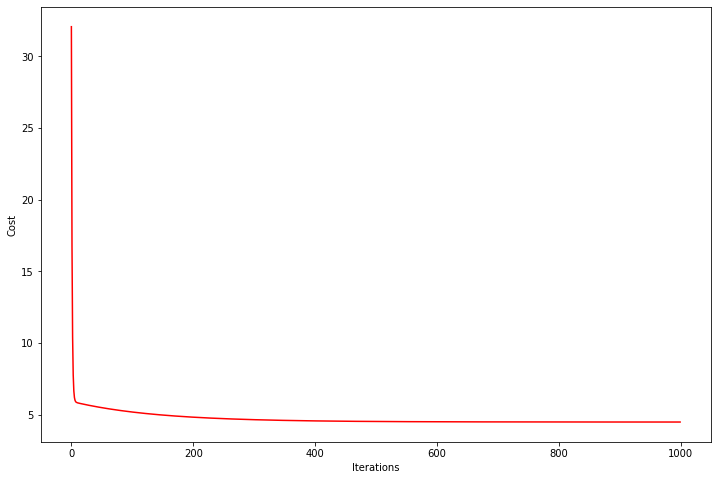

In [140]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(Iterations), cost, 'r')
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.show()

## 绘制拟合曲线

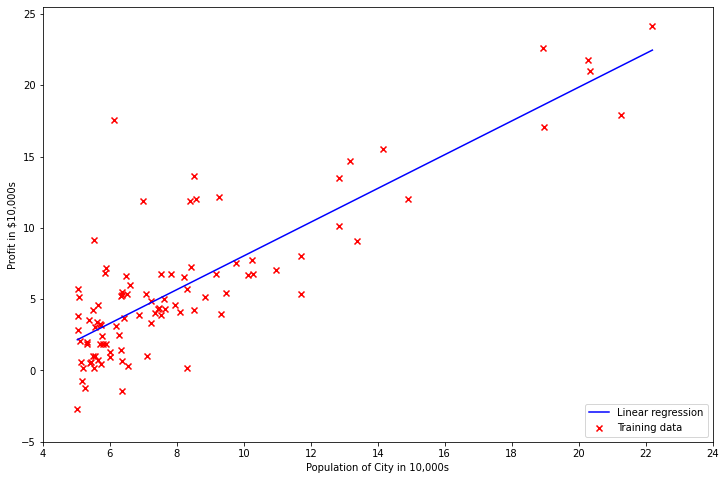

In [141]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = np.array(theta[0] + theta[1] * x)[0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'b', label='Linear regression')
ax.scatter(X[:, 1], Y[:, 0], color='r', marker="x", label="Training data")
ax.legend(loc=4)
plt.xticks(np.arange(4, 25, 2))
plt.yticks(np.arange(-5, 26, 5))
ax.set_xlabel("Population of City in 10,000s")
ax.set_ylabel("Profit in $10,000s")
plt.show()

# 多变量线性回归

## 加载数据

In [142]:
path2 = path + "/ex1data2.txt"
data2 = pd.read_csv(path2, header=None, names=["size", "bedrooms", "price"])
data2

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## 数据切割

In [143]:
data2.insert(0, "Ones", 1) # 增加一维

In [154]:
cols = data2.shape[1]

X2 = np.array(data2.iloc[:, :cols-1])
Y2 = np.array(data2.iloc[:, cols-1:cols])
X2, Y2

(array([[   1, 2104,    3],
        [   1, 1600,    3],
        [   1, 2400,    3],
        [   1, 1416,    2],
        [   1, 3000,    4],
        [   1, 1985,    4],
        [   1, 1534,    3],
        [   1, 1427,    3],
        [   1, 1380,    3],
        [   1, 1494,    3],
        [   1, 1940,    4],
        [   1, 2000,    3],
        [   1, 1890,    3],
        [   1, 4478,    5],
        [   1, 1268,    3],
        [   1, 2300,    4],
        [   1, 1320,    2],
        [   1, 1236,    3],
        [   1, 2609,    4],
        [   1, 3031,    4],
        [   1, 1767,    3],
        [   1, 1888,    2],
        [   1, 1604,    3],
        [   1, 1962,    4],
        [   1, 3890,    3],
        [   1, 1100,    3],
        [   1, 1458,    3],
        [   1, 2526,    3],
        [   1, 2200,    3],
        [   1, 2637,    3],
        [   1, 1839,    2],
        [   1, 1000,    1],
        [   1, 2040,    4],
        [   1, 3137,    3],
        [   1, 1811,    4],
        [   1, 1437,

## 数据可视化（三维）

### 写法一

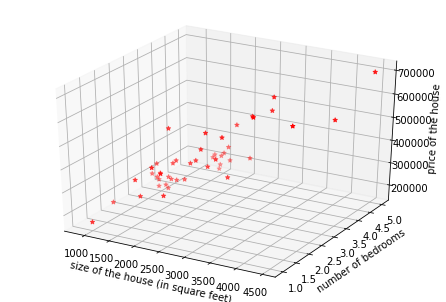

In [145]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.scatter(data2["size"], data2['bedrooms'], data2['price'] ,c="r" ,marker="*")
ax3d.set_xlabel("size of the house (in square feet)")
ax3d.set_ylabel("number of bedrooms")
ax3d.set_zlabel("price of the house")
plt.show()

### 写法二

Text(0.5, 0, 'price of the house')

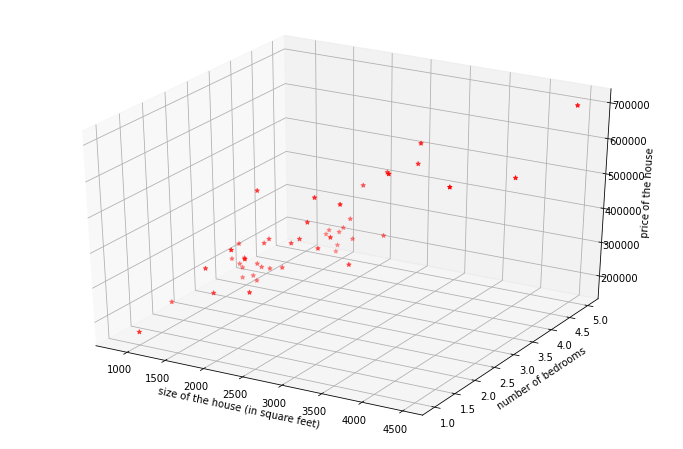

In [146]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(data2["size"], data2['bedrooms'], data2['price'] ,c="r" ,marker="*")
 
ax.set_xlabel("size of the house (in square feet)")
ax.set_ylabel("number of bedrooms")
ax.set_zlabel("price of the house")

## 特征归一化
公式：

In [155]:
def featureNormalize(X):
  X = X.astype(float) # 将nparray从int转为float
  for i in range(1, X.shape[1]):
    temp1 = X[:, i] - np.mean(X[:, i])
    temp2 = temp1 / np.std(X[:, i])
    X[:, i] = temp2
  return X

X2 = featureNormalize(X2)
X2

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

## 梯度下降

In [157]:
Iterations = 10
LearningRate = 1
theta = np.matrix(np.zeros(len(X2[0]))).T # (n+1)*1

cost, theta = GradientDescent(X2, Y2, theta, Iterations, LearningRate)
# print(theta)

[[340412.65957447]
 [109116.02965272]
 [ -6558.41402464]]


## 绘制代价函数

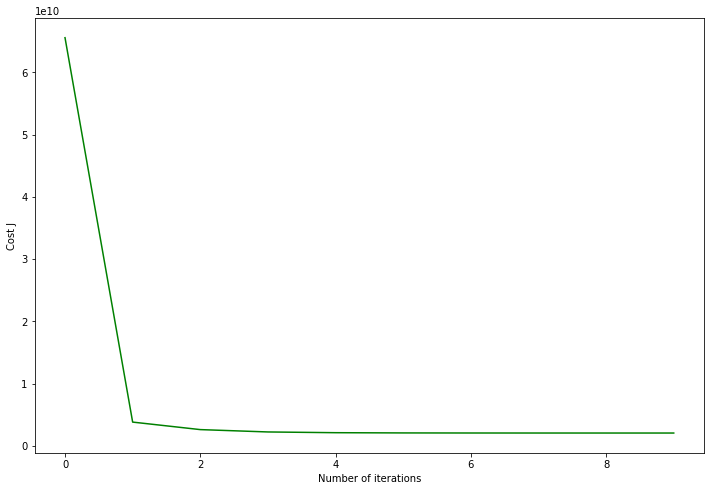

In [149]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(Iterations), cost, 'green')
ax.set_xlabel("Number of iterations")
ax.set_ylabel("Cost J")
plt.show()

## 正规方程求解最优权重

In [159]:
theta = np.linalg.inv(X2.T @ X2) @ X2.T @ Y2
print(theta)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
